# Project goal :
To try and understand the fate of pronouns upon backtranslation using Google translate.

## Notebook goals
- Generate the dataset entailing 86 professions
- Generate the $86 \times 219$ matrix of translations and back-translations across the 109 languages being offered by the Google translate API
( $219 = 109 \times 2 +1) $


In [ ]:
import sys
import os
from tqdm import tqdm_notebook
from google.colab import drive
import importlib
importlib.reload(sys)
#######################
drive.flush_and_unmount()
drive.mount('/gdrive', force_remount=True)
# Enter your own proj_dir here
proj_dir='/gdrive/My Drive/Colab Notebooks/Backtranslation_contronym'
os.chdir(proj_dir)
#############################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Cleanliness of displays
np.set_printoptions(suppress=True)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%precision 3

Mounted at /gdrive


'%.3f'

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%precision 3

'%.3f'

In [ ]:
# os.makedirs('./plots/')

# Load the list of all the languages that Google translate provides for.
Source: https://cloud.google.com/translate/docs/languages

In [ ]:
df_goog_lang=pd.read_csv('google_languages.csv')
df_goog_lang.head()

,Language,ISO-639-1 Code
0,Afrikaans,af
1,Albanian,sq
2,Amharic,am
3,Arabic,ar
4,Armenian,hy


In [ ]:
list_lang=df_goog_lang.iloc[:,1].values
list_lang

array(['af', 'sq', 'am', 'ar', 'hy', 'az', 'eu', 'be', 'bn', 'bs', 'bg',
       'ca', 'ceb', 'zh-CN', 'zh-TW', 'co', 'hr', 'cs', 'da', 'nl', 'en',
       'eo', 'et', 'fi', 'fr', 'fy', 'gl', 'ka', 'de', 'el', 'gu', 'ht',
       'ha', 'haw', 'he', 'hi', 'hmn', 'hu', 'is', 'ig', 'id', 'ga', 'it',
       'ja', 'jv', 'kn', 'kk', 'km', 'rw', 'ko', 'ku', 'ky', 'lo', 'la',
       'lv', 'lt', 'lb', 'mk', 'mg', 'ms', 'ml', 'mt', 'mi', 'mr', 'mn',
       'my', 'ne', 'no', 'ny', 'or', 'ps', 'fa', 'pl', 'pt', 'pa', 'ro',
       'ru', 'sm', 'gd', 'sr', 'st', 'sn', 'sd', 'si', 'sk', 'sl', 'so',
       'es', 'su', 'sw', 'sv', 'tl', 'tg', 'ta', 'tt', 'te', 'th', 'tr',
       'tk', 'uk', 'ur', 'ug', 'uz', 'vi', 'cy', 'xh', 'yi', 'yo', 'zu'],
      dtype=object)

In [ ]:
df_bt_professions=pd.read_csv('df_bt_prof.csv')
df_bt_professions.shape
# 1+(109 x 2)= 219 columns

(86, 219)

In [ ]:
df_bt_professions

,Original,En2Hindi,Hindi2En,En2Urdu,Urdu2En,En2Afrikaans,Afrikaans2En,En2Albanian,Albanian2En,En2Amharic,Amharic2En,En2Arabic,Arabic2En,En2Armenian,Armenian2En,En2Azerbaijani,Azerbaijani2En,En2Basque,Basque2En,En2Belarusian,Belarusian2En,En2Bengali,Bengali2En,En2Bosnian,Bosnian2En,En2Bulgarian,Bulgarian2En,En2Catalan,Catalan2En,En2Cebuano,Cebuano2En,En2Chinese_Simplified,Chinese_Simplified2En,En2Chinese_Traditional,Chinese_Traditional2En,En2Corsican,Corsican2En,En2Croatian,Croatian2En,En2Czech,...,En2Sundanese,Sundanese2En,En2Swahili,Swahili2En,En2Swedish,Swedish2En,En2Tagalog,Tagalog2En,En2Tajik,Tajik2En,En2Tamil,Tamil2En,En2Tatar,Tatar2En,En2Telugu,Telugu2En,En2Thai,Thai2En,En2Turkish,Turkish2En,En2Turkmen,Turkmen2En,En2Ukrainian,Ukrainian2En,En2Uyghur,Uyghur2En,En2Uzbek,Uzbek2En,En2Vietnamese,Vietnamese2En,En2Welsh,Welsh2En,En2Xhosa,Xhosa2En,En2Yiddish,Yiddish2En,En2Yoruba,Yoruba2En,En2Zulu,Zulu2En
0,She is an advocate.,वह एक वकील है।,He is a lawyer.,وہ ایک وکیل ہے۔,He is a lawyer.,Sy is 'n advokaat.,She's a lawyer.,Ajo është avokate.,She is a lawyer.,ተሟጋች ናት ፡፡,She is an advocate.,هي مناصرة.,She is an advocate.,Նա փաստաբան է:,He is a lawyer.,O vəkildir.,He is a lawyer.,Abokatua da.,He is a lawyer.,Яна абаронца.,She is a defender.,তিনি একজন অ্যাডভোকেট।,He is an advocate.,Ona je advokat.,She is a lawyer.,Тя е адвокат.,She is a lawyer.,És una defensora.,She is an advocate.,Siya usa ka manlalaban.,He is a defender.,她是一位拥护者。,She is a champion.,她是一位擁護者。,She is a champion.,Hè un difensore.,He is a defender.,Ona je odvjetnica.,She's a lawyer.,Je obhájkyní.,...,Anjeunna mangrupikeun pangacara.,He is a lawyer.,Yeye ni wakili.,He is a lawyer.,Hon är en advokat.,She's a lawyer.,Siya ay isang tagapagtaguyod.,He is an advocate.,Вай адвокат аст.,She is a lawyer.,அவள் ஒரு வக்கீல்.,She is a lawyer.,Ул яклаучы.,He is a defender.,ఆమె న్యాయవాది.,She is a lawyer.,เธอเป็นผู้สนับสนุน,She is a supporter,O bir avukattır.,"['He is a lawyer.', 'She is a lawyer.']",Aklawçy.,Lawyer.,Вона є адвокатом.,She is a lawyer.,ئۇ بىر ئادۋوكات.,He is a lawyer.,U advokat.,He is a lawyer.,Cô ấy là một người ủng hộ.,She is an advocate.,Mae hi'n eiriolwr.,She is an advocate.,Ungummeli.,He is a lawyer.,זי איז אַן אדוואקאט.,She is a lawyer.,O jẹ alagbawi.,He is an advocate.,Ungummeli.,He is a lawyer.
1,She is an agriculturist.,वह एक कृषक है।,He is a farmer.,وہ ایک زراعت پسند ہے۔,He is an agriculturist.,Sy is 'n landboukundige.,She is an agriculturist.,Ajo është një bujqësore.,It is an agricultural.,እርሷ የግብርና ባለሙያ ናት ፡፡,She is an agronomist.,هي زراعيّة.,It is agricultural.,Նա գյուղատնտես է:,He is an agriculturist.,"O, kənd təsərrüfatı mütəxəssisidir.",He is an agricultural specialist.,Nekazaria da.,He is a farmer.,Яна сельская гаспадарка.,She is farming.,তিনি একজন কৃষিবিদ।,He is an agriculturist.,Ona je poljoprivrednica.,She is a farmer.,Тя е земеделец.,She is a farmer.,És agricultora.,She is a farmer.,Usa siya ka Agrikulturista.,He is an Agriculturalist.,她是一位农业学家。,She is an agriculturist.,她是一位農業學家。,She is an agriculturist.,Hè agricultore.,He is a farmer.,Ona je poljoprivrednica.,She is a farmer.,Je to zemědělkyně.,...,Anjeunna ahli pertanian.,He is an agricultural expert.,Yeye ni mtaalam wa kilimo.,He is an agricultural expert.,Hon är jordbrukare.,She is a farmer.,Siya ay isang magsasaka.,He is a farmer.,Вай кишоварз аст.,She is a farmer.,அவள் ஒரு விவசாயி.,She is a farmer.,Ул агроном.,Ul agronomist.,ఆమె వ్యవసాయదారుడు.,She is a farmer.,เธอเป็นเกษตรกร,She is a farmer,Tarımcıdır.,It is agricultural.,Ol agronom.,He is an agronomist.,Вона аграрій.,She is an agrarian.,ئۇ دېھقانچىلىقچى.,He is a farmer.,U qishloq xo'jaligi mutaxassisi.,He is an agricultural specialist.,Cô ấy là một nhà nông nghiệp.,She is an agriculturalist.,Mae hi'n amaethwr.,She is a farmer.,Uyingcali kwezolimo.,He is an agricultural expert.,זי איז אַ לאַנדווירטשאַפטלעך.,She is an agricultural.,Arabinrin agbe ni.,She is a farmer's sister.,Ungumlimi.,He is a farmer.
2,She is an aircraft pilot.,वह एक एयरक्राफ

There are some languages where both options are returned:

In [ ]:
df_bt_professions.loc[:,'Turkish2En']

0               ['He is a lawyer.', 'She is a lawyer.']
1                                  It is agricultural. 
2     ["He's an airplane pilot.", "She's an airplane...
3               ["He's an artist.", "She's an artist."]
4       ["He's an astronomer.", "She's an astronomer."]
                            ...                        
81                              It is a visual artist. 
82                                    He's a waitress. 
83    ['He is a web designer.', 'She is a web design...
84    ['He is a web developer.', 'She is a web devel...
85          ["He's a zoologist.", "She's a zoologist."]
Name: Turkish2En, Length: 86, dtype: object

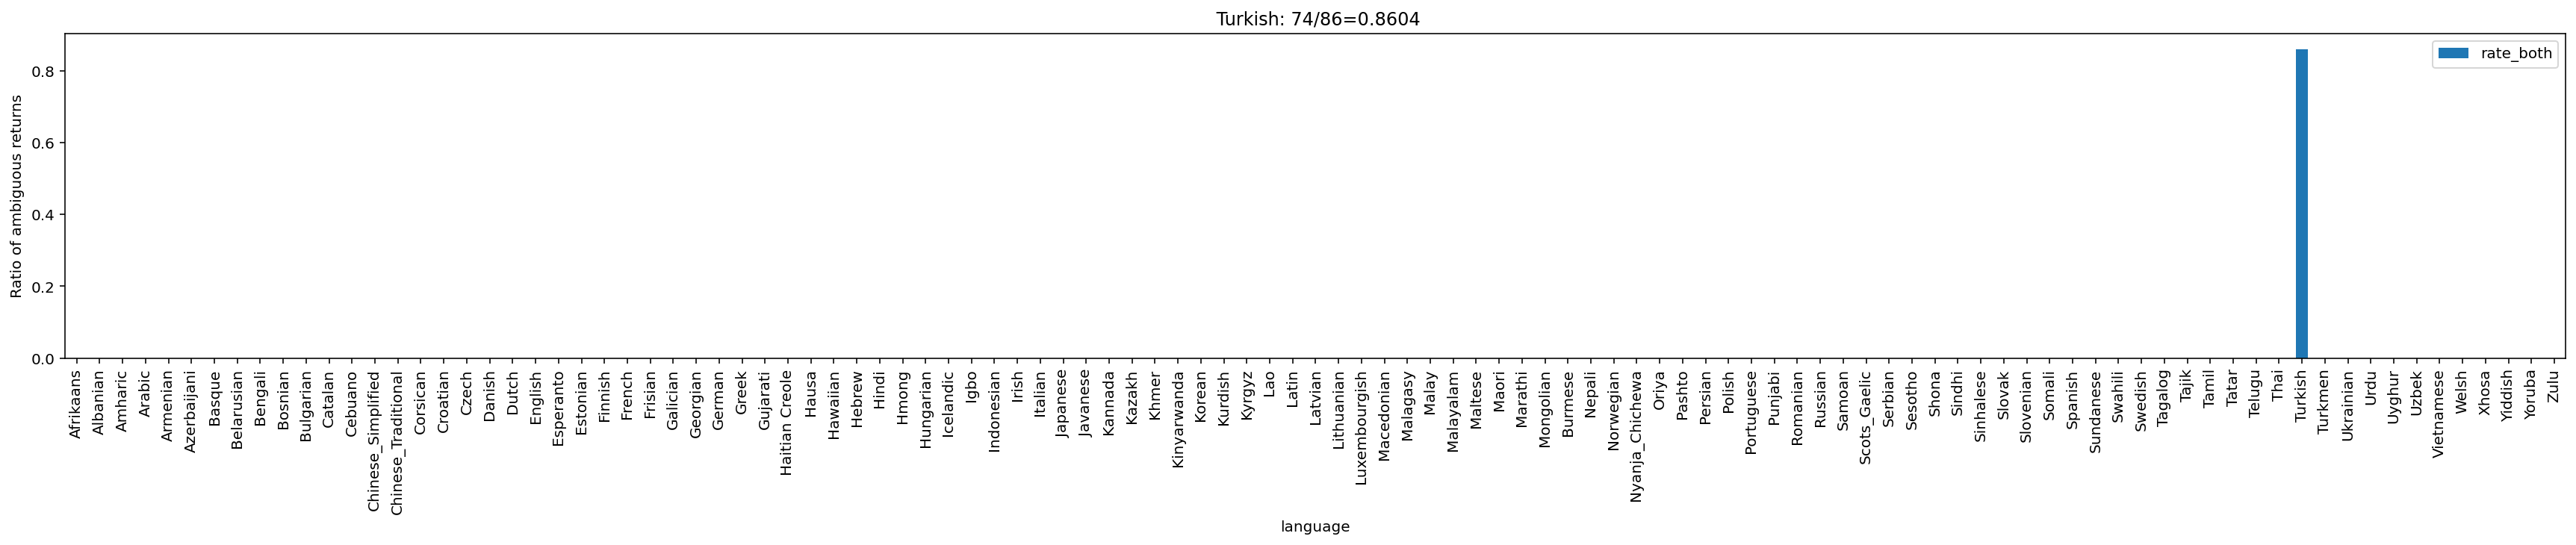

In [ ]:
rate_both=[]
for lang_name in df_goog_lang.Language:
  # Word tokenize + Stem + lower
  rate_both.append(df_bt_professions.loc[:,df_bt_professions.columns==f'{lang_name}2En'].iloc[:,0].str.contains('\[').mean())
df_rate_both=pd.DataFrame(np.stack([df_goog_lang.Language.values, rate_both]).T,columns=['language','rate_both'])
df_rate_both.plot(x='language',kind='bar',figsize=(30,4))
plt.ylabel('Ratio of ambiguous returns'); 
amb_turk=df_bt_professions.loc[:,'Turkish2En'].str.contains('\[').sum()
plt.title(f' Turkish: {amb_turk}/86=0.8604');

In [ ]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_bt_out=pd.DataFrame(data=np.empty((df_bt_professions.shape[0],df_goog_lang.shape[0]),dtype=object), columns=df_goog_lang.Language.values)
df_bt_out.head()

,Afrikaans,Albanian,Amharic,Arabic,Armenian,Azerbaijani,Basque,Belarusian,Bengali,Bosnian,Bulgarian,Catalan,Cebuano,Chinese_Simplified,Chinese_Traditional,Corsican,Croatian,Czech,Danish,Dutch,English,Esperanto,Estonian,Finnish,French,Frisian,Galician,Georgian,German,Greek,Gujarati,Haitian Creole,Hausa,Hawaiian,Hebrew,Hindi,Hmong,Hungarian,Icelandic,Igbo,...,Oriya,Pashto,Persian,Polish,Portuguese,Punjabi,Romanian,Russian,Samoan,Scots_Gaelic,Serbian,Sesotho,Shona,Sindhi,Sinhalese,Slovak,Slovenian,Somali,Spanish,Sundanese,Swahili,Swedish,Tagalog,Tajik,Tamil,Tatar,Telugu,Thai,Turkish,Turkmen,Ukrainian,Urdu,Uyghur,Uzbek,Vietnamese,Welsh,Xhosa,Yiddish,Yoruba,Zulu
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
for lang_name in df_goog_lang.Language:
  # Word tokenize + Stem + lower
  pr_bt=df_bt_professions.loc[:,df_bt_professions.columns==f'{lang_name}2En'].iloc[:,0].apply(lambda x: ps.stem(word_tokenize(x)[0])).str.lower().values
  df_bt_out.loc[:,lang_name]=pr_bt

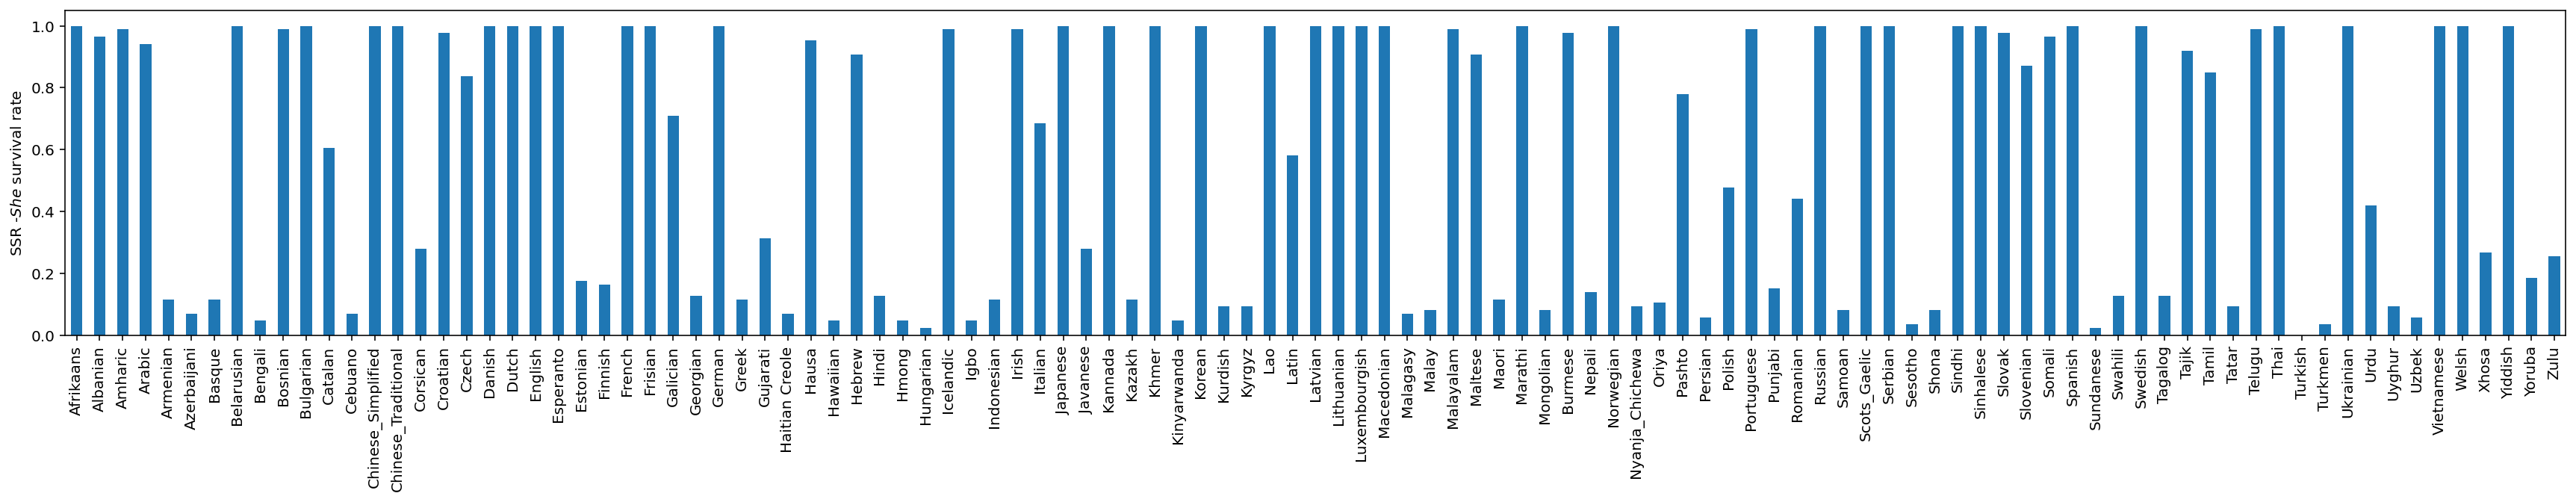

In [ ]:
(df_bt_out=='she').mean(axis=0).plot(kind='bar',figsize=(30,4))
plt.ylabel('SSR -$She$ survival rate');
plt.savefig('./plots/ssr.pdf',bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.savefig('./plots/ssr.png',bbox_inches='tight',pad_inches = 0, dpi = 300)

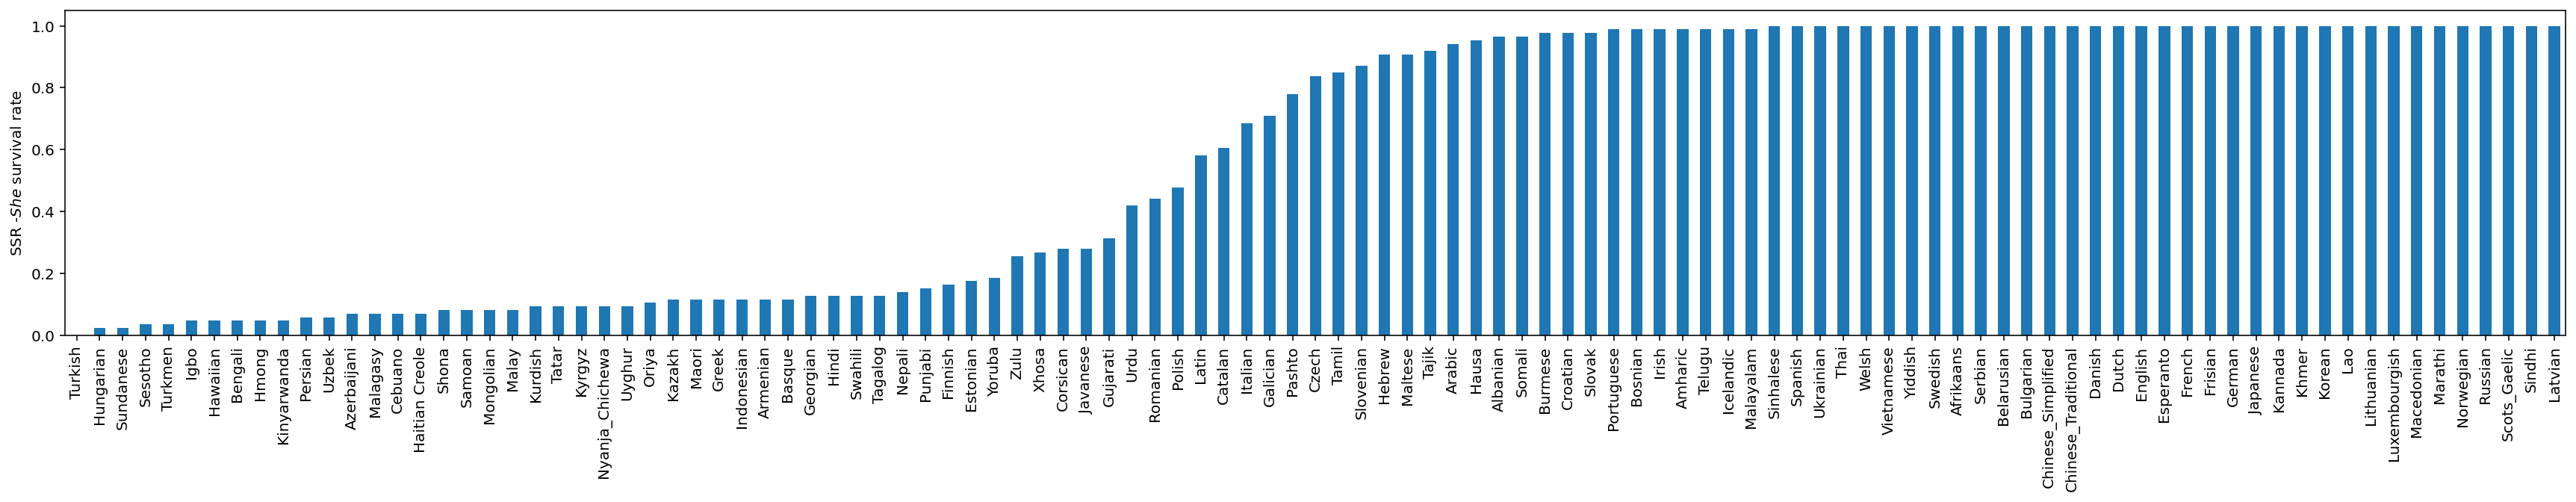

In [ ]:
(df_bt_out=='she').mean(axis=0).sort_values().plot(kind='bar',figsize=(30,4))
plt.ylabel('SSR -$She$ survival rate');
plt.savefig('./plots/ssr_sorted.pdf',bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.savefig('./plots/ssr_sorted.png',bbox_inches='tight',pad_inches = 0, dpi = 300)

In [ ]:
df_ssr=(df_bt_out=='she').mean(axis=0).sort_values().to_frame().reset_index()
df_ssr.columns=['language','ssr']
df_ssr.to_csv('df_ssr.csv',index=False)

In [ ]:
df_indian=pd.read_csv('google_indian.csv')
df_indian

,Language,ISO-639-1 Code
0,Bengali,bn
1,Gujarati,gu
2,Hindi,hi
3,Kannada,kn
4,Malayalam,ml
5,Marathi,mr
6,Nepali,ne
7,Oriya,or
8,Punjabi,pa
9,Sindhi,sd


,language,ssr
0,Bengali,0.046512
1,Oriya,0.104651
2,Hindi,0.127907
3,Nepali,0.139535
4,Punjabi,0.151163
5,Gujarati,0.313953
6,Urdu,0.418605
7,Tamil,0.848837
8,Telugu,0.988372
9,Malayalam,0.988372


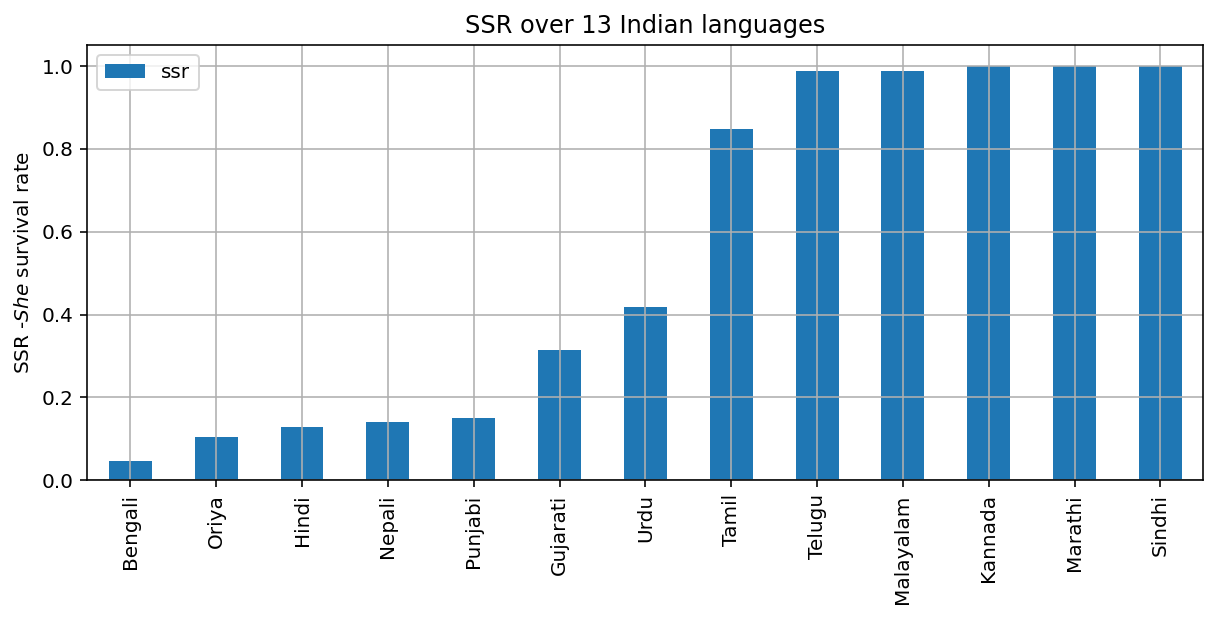

In [ ]:
df_ssr_indian=df_ssr.loc[df_ssr.language.isin(df_indian.Language.values)]
df_ssr_indian.reset_index(inplace=True,drop=True)
df_ssr_indian.plot(kind='bar',figsize=(10,4))
plt.ylabel('SSR -$She$ survival rate');
plt.xticks(np.arange(df_ssr_indian.shape[0]), list(df_ssr_indian.language.values))
plt.title(f'SSR over {df_ssr_indian.shape[0]} Indian languages');
plt.grid('On')
plt.savefig('./plots/ssr_sorted_indian.pdf',bbox_inches='tight',pad_inches = 0, dpi = 300);
plt.savefig('./plots/ssr_sorted_indian.png',bbox_inches='tight',pad_inches = 0, dpi = 300);
df_ssr_indian

In [ ]:
df_bt_indian=df_bt_professions.loc[:,[f'{lang}2En' for lang in df_ssr_indian.language]]
df_bt_indian

,Bengali2En,Oriya2En,Hindi2En,Nepali2En,Punjabi2En,Gujarati2En,Urdu2En,Tamil2En,Telugu2En,Malayalam2En,Kannada2En,Marathi2En,Sindhi2En
0,He is an advocate.,He is a lawyer.,He is a lawyer.,He is a lawyer.,He is a lawyer.,She is an advocate.,He is a lawyer.,She is a lawyer.,She is a lawyer.,She is a lawyer.,She is a lawyer.,She is a lawyer.,She is a lawyer
1,He is an agriculturist.,He is a farmer.,He is a farmer.,He is an agriculturist.,He is an agriculturist.,He is an agronomist.,He is an agriculturist.,She is a farmer.,She is a farmer.,She is a farmer.,She is a farmer.,She is a farmer.,She is a farmer.
2,He is an aircraft pilot.,He is a pilot,He is an aircraft pilot.,He is a pilot.,He is an aircraft pilot.,He is an aircraft pilot.,He is the pilot of an airplane.,He is an airline pilot.,She is a flight pilot.,She is an airline pilot.,She’s a flight pilot.,She is the pilot of the aircraft.,She is an aircraft pilot.
3,He is an artist.,He is an artist,she's an artist.,He is an artist.,He is an artist.,He is an artist.,She is an artist.,She is an artist.,She is an artist.,She is an artist.,She is an artist.,She is an artist.,She is an artist
4,He is an astronomer.,He is an astronomer,He is an astronomer.,He is an astronomer.,He is an astronomer.,He is an astronomer.,He is an astronomer.,She is an astronomer.,She is an astronomer.,She is an astronomer.,She is an astronomer.,She is an astronomer.,She is classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,He is a visual artist.,He is a visual artist,He is a visual artist.,He is a visual artist.,He is a visual artist.,He is a visual artist.,She is a visual artist.,He is a visual artist.,She is a visual artist.,She is a visual artist.,She is a visual artist.,She is a visual artist.,She is a portrait artist.
82,He is a waiter.,He is a waiter,he is a waiter.,He is a waiter.,He is a waiter.,He is a waiter.,She is a waiter.,She is an employee.,She is a waiter.,She is a waiter.,She's the waiter.,She is a waiter.,She is the waiter
83,He is a web designer.,He is a web designer,He is a web designer.,She is a web designer.,She is a web designer.,She is a web designer.,She is a web designer.,He is a web designer.,She is a web designer.,She is a web designer.,She is a web designer.,She is a web designer.,She is a web designer.
84,He is a web developer.,He is a web developer,He is a web developer.,He is a web developer.,He is a web developer.,He is a web developer.,She is a web developer.,He is a web developer.,She is a web developer.,She is a web developer.,She is a web developer.,She is a web developer.,She is a web developer.


In [ ]:
professions_86=pd.read_csv('professions_86_final.txt',header=None)[0].values
professions_86

array(['advocate  ', 'agriculturist  ', 'aircraft pilot ', 'artist  ',
       'astronomer  ', 'attorney  ', 'audiologist  ', 'banker  ',
       'barber  ', 'bartender  ', 'biologist  ', 'bookkeeper  ',
       'botanist  ', 'builder  ', 'businessperson  ', 'butcher  ',
       'carpenter  ', 'cashier  ', 'chef  ', 'chemist  ',
       'clergy advisor ', 'clinical lab technician', 'coach  ',
       'developer  ', 'dietitian  ', 'ecologist  ', 'editor  ',
       'electrician  ', 'EMT specialist ', 'farmer  ', 'filmmaker  ',
       'firefighter  ', 'fisherman  ', 'flight attendant ',
       'geneticist  ', 'geologist  ', 'graphic designer ',
       'human resource specialist', 'immunologist  ', 'interpreters  ',
       'jeweller  ', 'lawyer  ', 'librarian  ',
       'licensed practical nurse', 'mechanic  ',
       'medical laboratory scientist', 'meteorologist  ', 'midwife  ',
       'military officer ', 'nutritionist  ', 'oceanographer  ',
       'osteopath  ', 'painter  ', 'paramedic  ', '

In [ ]:
df_bt_ind=df_bt_indian.applymap(lambda x: ps.stem(word_tokenize(x)[0]).lower())
df_bt_ind.set_index(professions_86,inplace=True)
df_bt_ind

,Bengali2En,Oriya2En,Hindi2En,Nepali2En,Punjabi2En,Gujarati2En,Urdu2En,Tamil2En,Telugu2En,Malayalam2En,Kannada2En,Marathi2En,Sindhi2En
advocate,he,he,he,he,he,she,he,she,she,she,she,she,she
agriculturist,he,he,he,he,he,he,he,she,she,she,she,she,she
aircraft pilot,he,he,he,he,he,he,he,he,she,she,she,she,she
artist,he,he,she,he,he,he,she,she,she,she,she,she,she
astronomer,he,he,he,he,he,he,he,she,she,she,she,she,she
...,...,...,...,...,...,...,...,...,...,...,...,...,...
visual artist,he,he,he,he,he,he,she,he,she,she,she,she,she
waiter,he,he,he,he,he,he,she,she,she,she,she,she,she
web designer,he,he,he,she,she,she,she,he,she,she,she,she,she
web developer,he,he,he,he,he,he,she,he,she,she,she,she,she


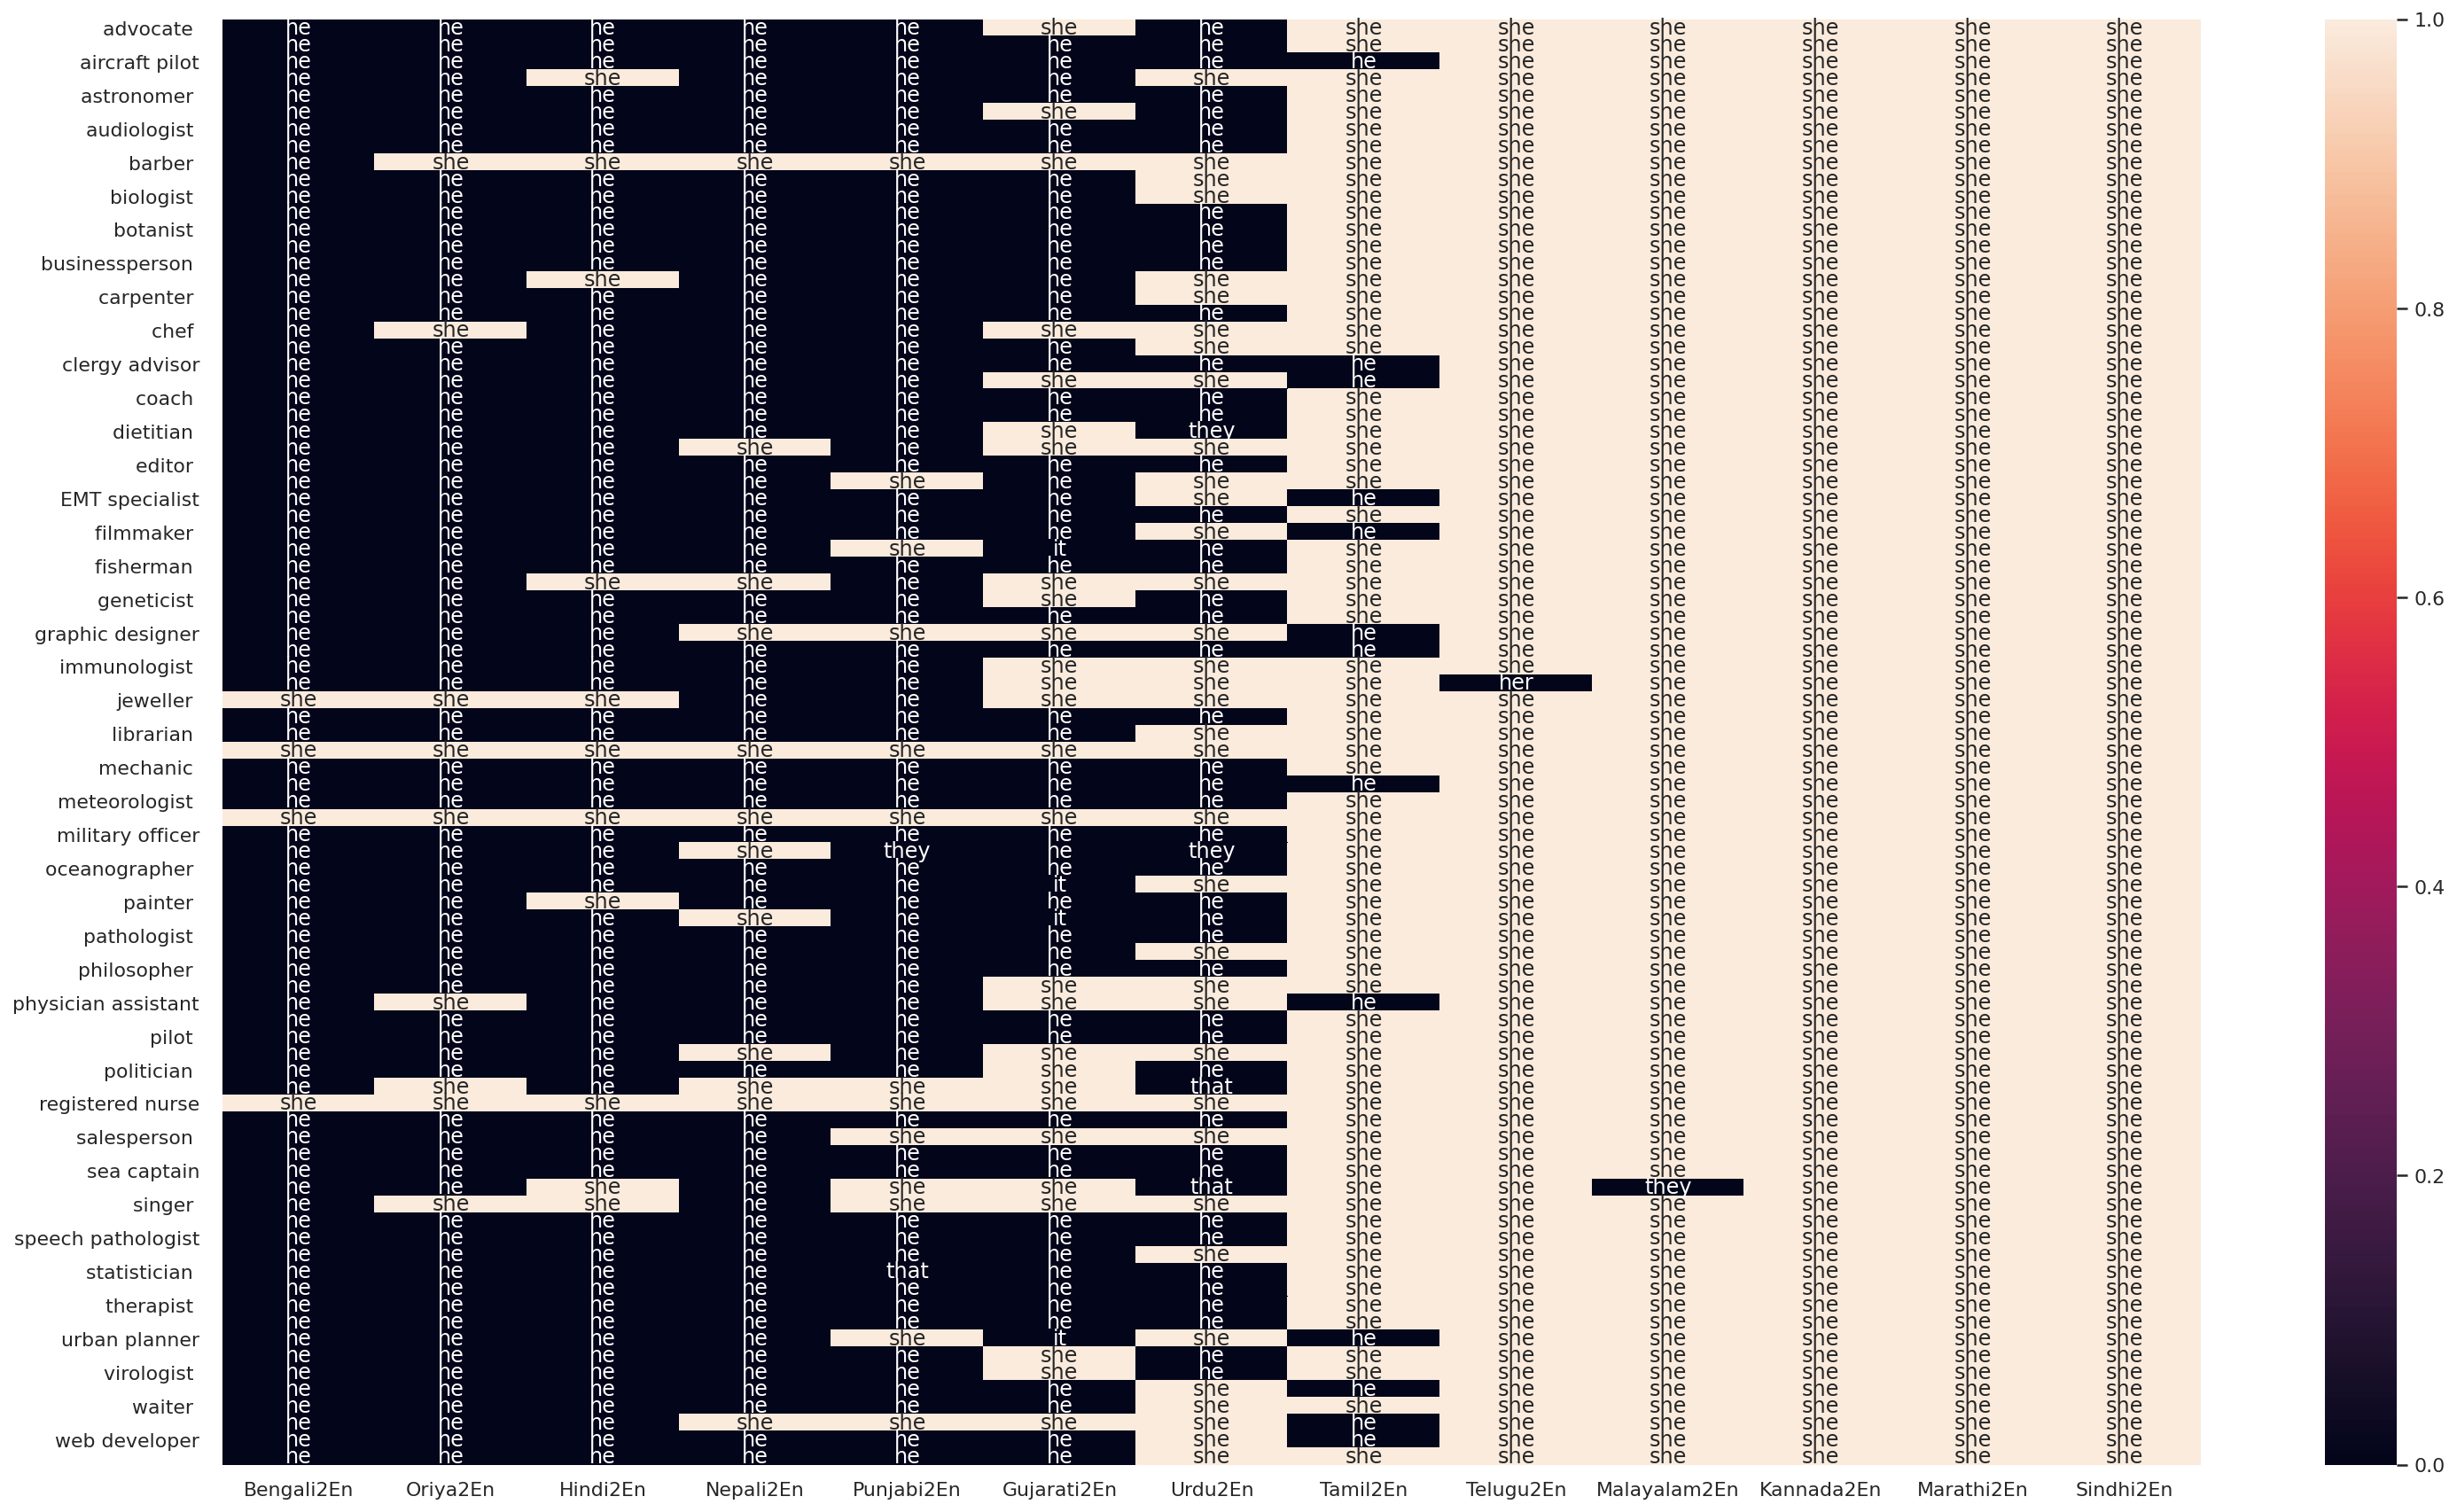

In [ ]:
import seaborn as sns; sns.set_theme()
plt.figure(figsize=(25,15))
sns.heatmap((df_bt_ind=='she').astype(int), annot=df_bt_ind, fmt="")
plt.savefig('./plots/heatmap_indian.pdf',bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.savefig('./plots/heatmap_indian.png',bbox_inches='tight',pad_inches = 0, dpi = 300)

In [ ]:
df_bt_ind.to_csv('df_bt_ind.csv')

human resource specialist       0.384615
aircraft pilot                  0.384615
clergy advisor                  0.384615
medical laboratory scientist    0.384615
sea captain                     0.461538
                                  ...   
singer                          0.846154
barber                          0.923077
licensed practical nurse        1.000000
midwife                         1.000000
registered nurse                1.000000
Length: 86, dtype: float64

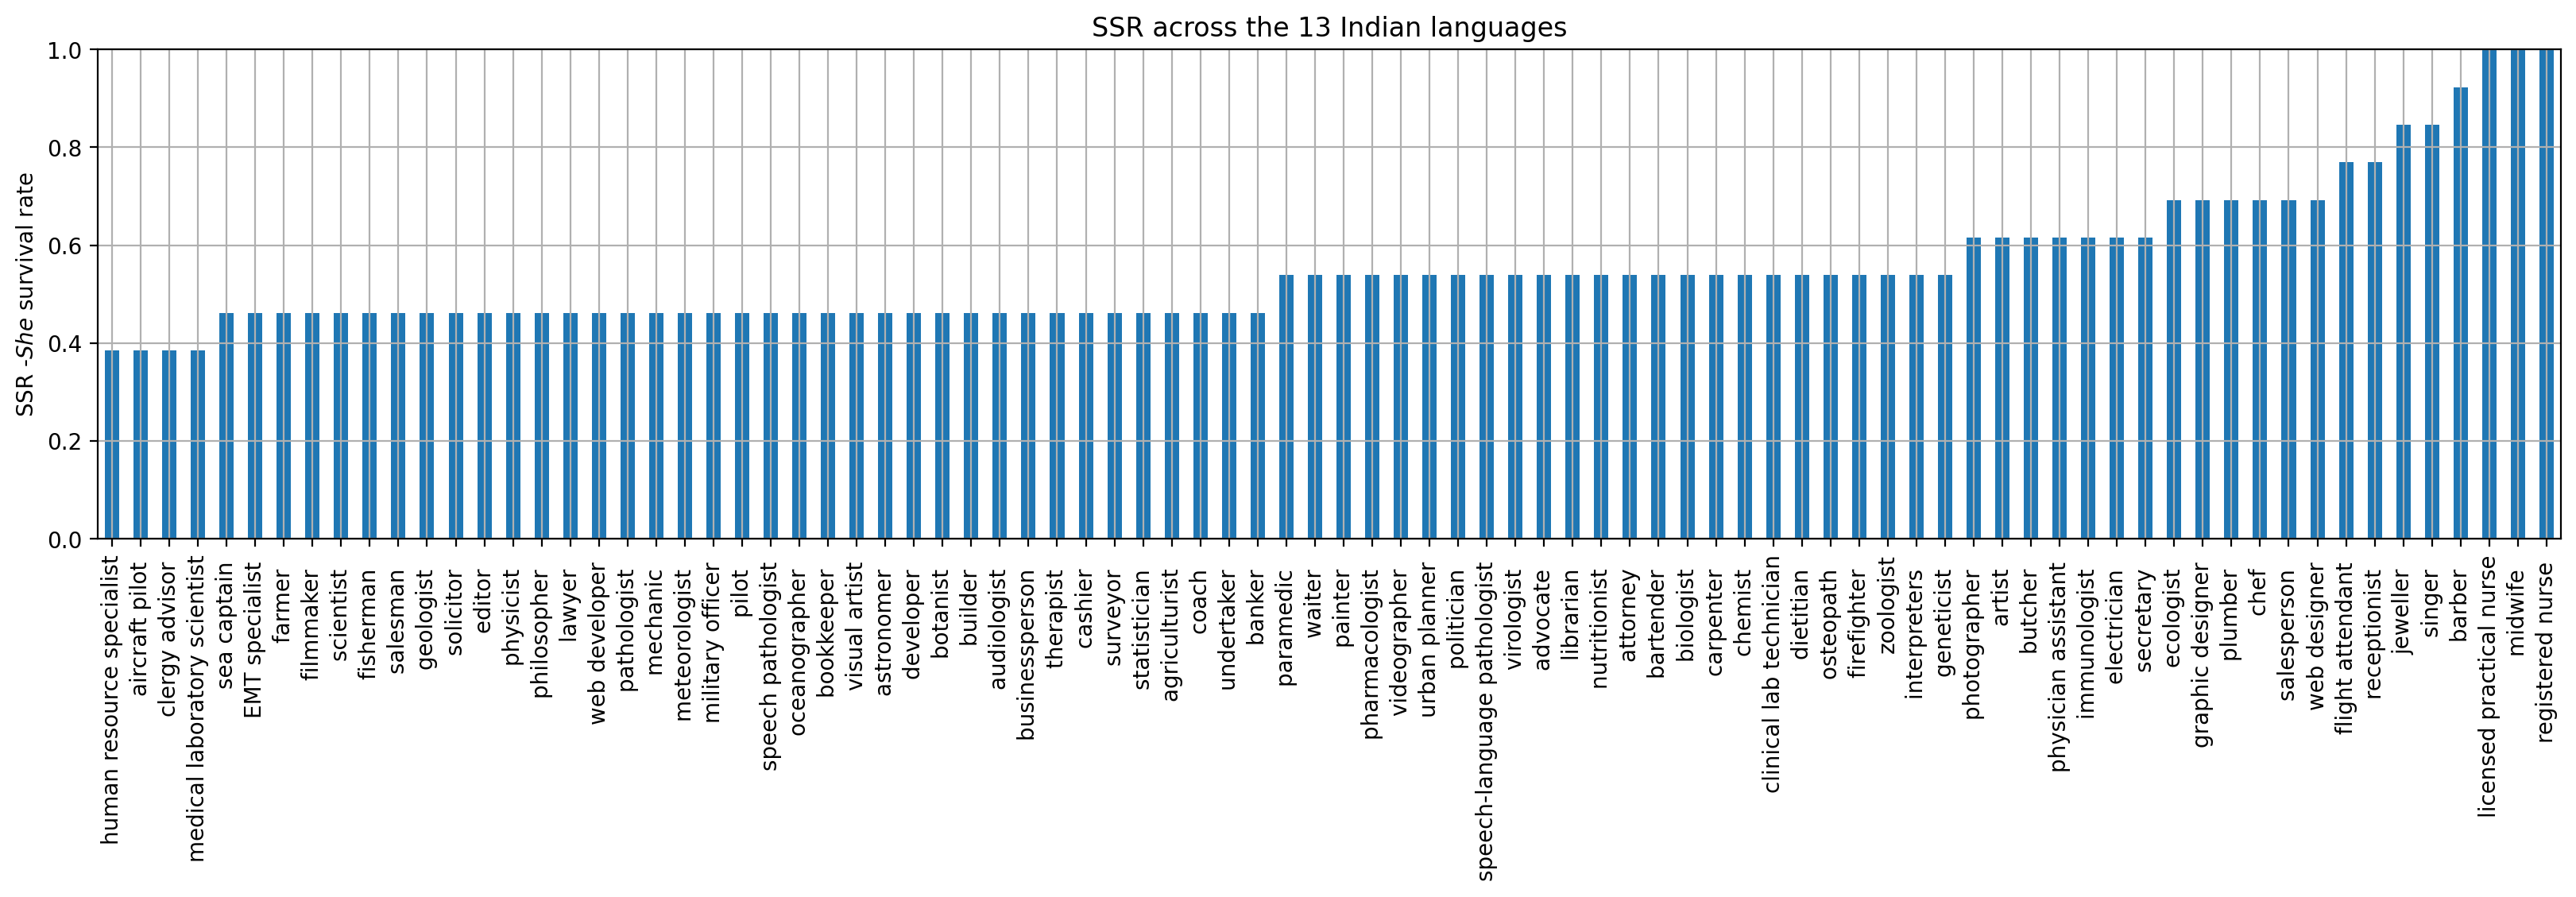

In [ ]:
plt.style.use('default')
(df_bt_ind=='she').mean(axis=1).sort_values().plot(kind='bar',figsize=(20,4))
plt.ylabel('SSR -$She$ survival rate');
plt.grid('On')
plt.ylim([0,1])
plt.title('SSR across the 13 Indian languages');
plt.savefig('./plots/ssr_13.pdf',bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.savefig('./plots/ssr_13.png',bbox_inches='tight',pad_inches = 0, dpi = 300)
(df_bt_ind=='she').mean(axis=1).sort_values()

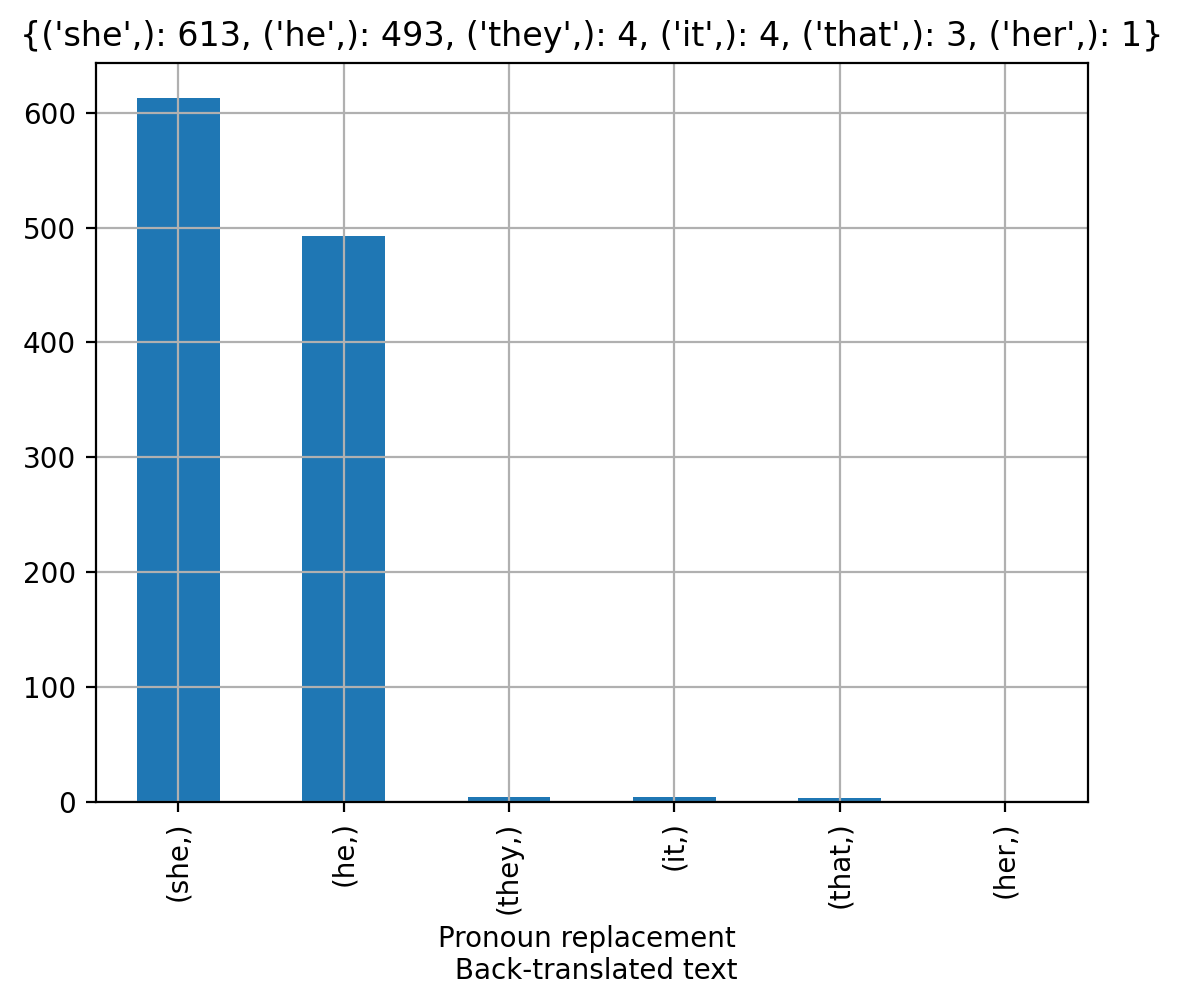

In [ ]:
pd.DataFrame(df_bt_ind.values.flatten()).value_counts().plot(kind='bar')
plt.grid('On')
plt.xlabel('Pronoun replacement \n Back-translated text')
plt.title(pd.DataFrame(df_bt_ind.values.flatten()).value_counts().to_dict());
plt.savefig('./plots/pronoun_distr_13.pdf',bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.savefig('./plots/pronoun_distr_13.png',bbox_inches='tight',pad_inches = 0, dpi = 300)

she     5566
he      3269
it       214
i         77
[         74
the       30
ul        21
you       12
they       9
a          8
dtype: int64

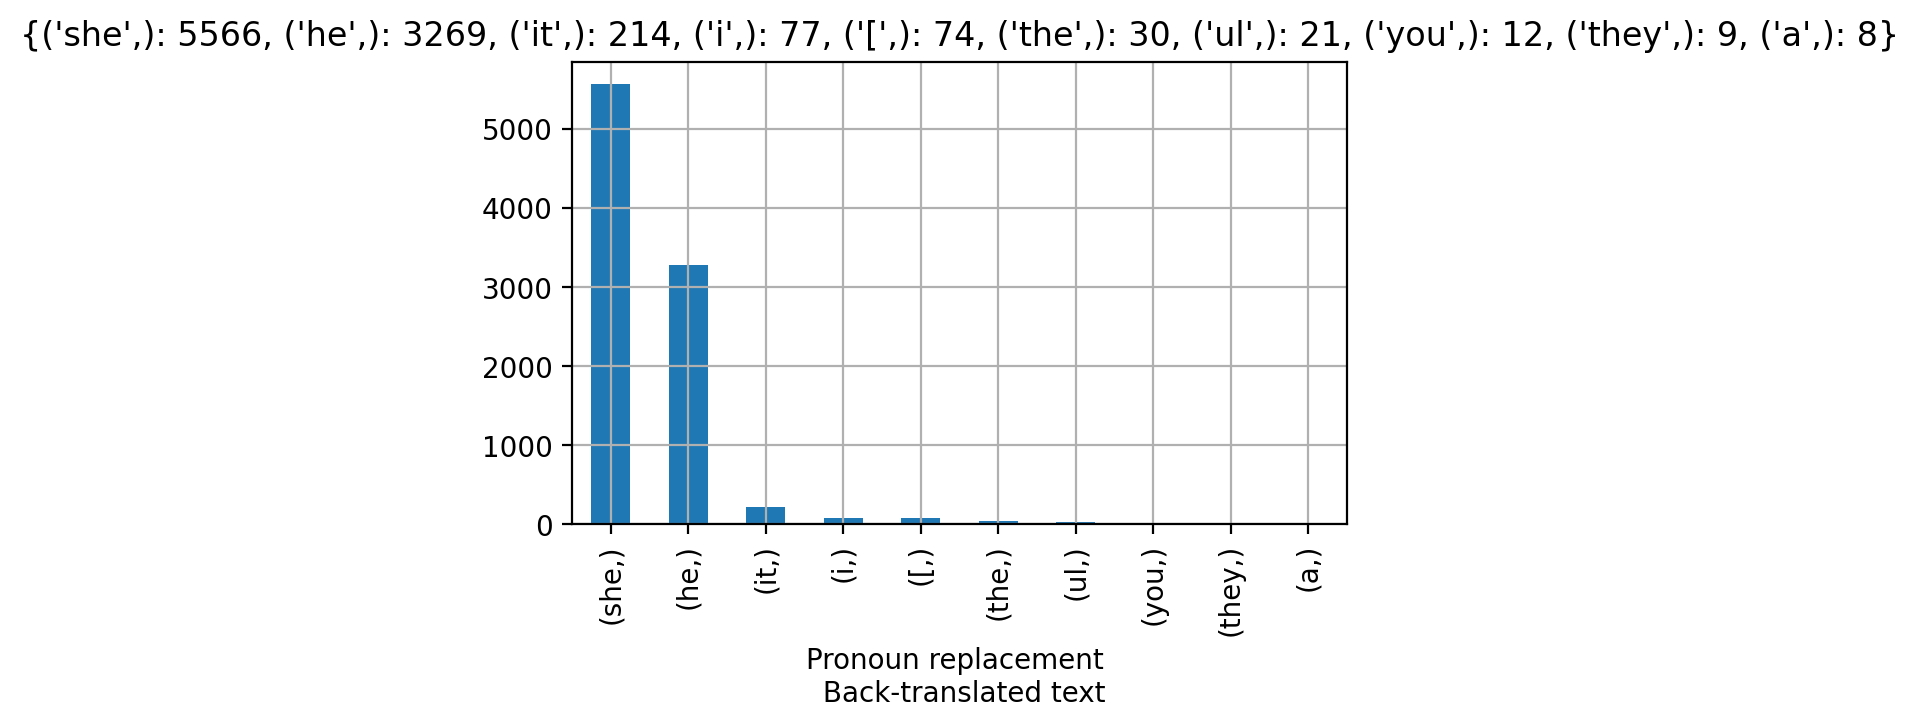

In [ ]:
# df_bt_all=df_bt_professions.applymap(lambda x: ps.stem(word_tokenize(x)[0]).lower())
# df_bt_all.set_index(professions_86,inplace=True)
df_bt_all=df_bt_all.loc[:,df_bt_all.columns.str.contains('2En')]
pd.DataFrame(df_bt_all.values.flatten()).value_counts()[0:10].plot(kind='bar',figsize=(5,3))
plt.xticks(rotation=90)
plt.grid('On')
plt.xlabel('Pronoun replacement \n Back-translated text')
plt.title(pd.DataFrame(df_bt_all.values.flatten()).value_counts()[0:10].to_dict());
pd.DataFrame(df_bt_all.values.flatten()).value_counts()[0:10]

In [ ]:
5566/(86*109)

0.594

In [ ]:
lang_=['Original','En2Hindi','Hindi2En', 'En2Urdu','Urdu2En',
 'En2Pashto','Pashto2En',
 'En2Turkish','Turkish2En',
 'En2Arabic','Arabic2En']
df_=df_bt_professions.loc[:,df_bt_professions.columns.isin(lang_)]

In [ ]:
df_.loc[df_.Arabic2En.apply(lambda x:x.split(' ')[0].lower())!='she',['Original','En2Arabic','Arabic2En']]

,Original,En2Arabic,Arabic2En
1,She is an agriculturist.,هي زراعيّة.,It is agricultural.
23,She is a developer.,هي مطورة.,It is upgraded.
62,She is a politician.,هي سياسية.,It is political.
74,She is a statistician.,هي إحصائية.,It is a statistic.
76,She is a therapist.,هي معالجة.,Are treated.


In [ ]:
df_.loc[df_.Urdu2En.apply(lambda x:x.split(' ')[0].lower())!='she',['Original','En2Urdu','Urdu2En']]

,Original,En2Urdu,Urdu2En
0,She is an advocate.,وہ ایک وکیل ہے۔,He is a lawyer.
1,She is an agriculturist.,وہ ایک زراعت پسند ہے۔,He is an agriculturist.
2,She is an aircraft pilot.,وہ ایک ہوائی جہاز کا پائلٹ ہے۔,He is the pilot of an airplane.
4,She is an astronomer.,وہ ایک ماہر فلکیات ہیں۔,He is an astronomer.
5,She is an attorney.,وہ ایک وکیل ہے۔,He is a lawyer.
6,She is an audiologist.,وہ آڈیولوجسٹ ہیں۔,He is an audiologist.
7,She is a banker.,وہ ایک بینکر ہے۔,He is a banker.
11,She is a bookkeeper.,وہ ایک بک کیپر ہے۔,He is a bookkeeper.
12,She is a botanist.,وہ ایک نباتیات کی ماہر ہے۔,He is a botanist.
13,She is a builder.,وہ ایک بلڈر ہے۔,He is a builder.
